# Bank loan analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
pd.set_option('display.max_columns',None)
df = pd.read_csv(r'H:\Data_science_srk\projects\bank_loan\financial_loan.csv')
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,Current,16-06-2021,992381,wedding,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,Current,16-06-2021,1192039,wedding,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,Current,16-06-2021,1089898,wedding,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,Current,16-06-2021,1194971,wedding,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [5]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

# data Understanding
1. **id:** unique loan id
2. **address_state:** Borrower location in states
3. **application_type:** the type of application (individual or joint) in our dataset there is only one unique value i.e Individual
4. **emp_length:** The borrower's employment length.
5. **emp_title:** The borrower's job title.
6. **grade:** In a bank loan dataset, the "grade" column typically represents a risk assessment assigned to a loan. It's a categorical variable that indicates the lender's perception of the borrower's creditworthiness and the likelihood of the loan being repaid.

    **Here's a breakdown of what the "grade" column usually signifies:**
   ***
   - Higher grades (e.g., A, B, C): These typically represent lower-risk borrowers with a higher likelihood of repaying the loan. They often come with   lower interest rates.
   - Lower grades (e.g., D, E, F): These indicate higher-risk borrowers with a greater chance of defaulting on the loan. They usually have higher interest rates to compensate for the increased risk.
8. **home_ownership:** The borrower's home ownership status.
9. **issue_date:** The date the loan was issued.
10. **last_credit_pull_date:**
11. **last_payment_date:** The date of the most recent payment.
12. **loan_status:** The current status of the loan (e.g., current, charged off, fully paid).
    
      **Here's a breakdown of the commonly used statuses:**
    ***
     - Current: This means the loan is active, and the borrower is making regular payments according to the agreed-upon terms.
     - Charged Off: This indicates that the lender has written off the loan as a loss. It typically occurs when a borrower has defaulted on the loan            and all reasonable collection efforts have been exhausted.
     - Fully Paid: This means the borrower has successfully repaid the entire loan principal and interest, and the loan has been closed.
14. **next_payment_date:** The scheduled date for the next payment.
15. **member_id:** The unique Identifier for the borrower.
16. **purpose:** The stated purpose of the loan.
17. **sub_grade:** the sub-grade provides a more granular assessment of a borrower's creditworthiness within a given loan grade, allowing for more precise risk pricing and underwriting decisions.
18. **term:** The loan term (e.g., 36 months, 60 months).
19. **verification_status:** The verification status of the borrower's income (e.g., verified, not verified, source verified).
20. **annual_income:** The borrower's annual income.
21. **dti:**  The debt-to-income ratio, representing the borrower's monthly debt payments divided by their monthly income.
22. **installment:** The monthly installment amount.
23. **int_rate:** The interest rate charged on the loan.
24. **loan_amount:** The total loan amount.
25. **total_acc:**  The total number of accounts (e.g., credit cards, loans) the borrower has.
26. **total_payment:** The total amount paid on the loan (including principal and interest).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

**convert date object into datetime format**

In [9]:
df['issue_date'] = pd.to_datetime(df['issue_date'],format='%d-%m-%Y')
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'],format='%d-%m-%Y')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'],format='%d-%m-%Y')
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'],format='%d-%m-%Y')

In [11]:
df.drop(columns=['emp_title','application_type','total_acc','member_id'],inplace=True)

In [13]:
df.isnull().sum()

id                       0
address_state            0
emp_length               0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_payment            0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
df['emp_length'].replace({'< 1 year':'1 year','10+ years':'10 years'},inplace = True)
# df['loan_status'].replace({'Fully Paid':'Good','Charged Off':'Bad','Current':'Good'},inplace=True)
# df['verification_status'].replace({'Source Verified':'Verified'},inplace=True)

In [19]:
# get the unique values for each column
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

address_state
['GA' 'CA' 'TX' 'IL' 'PA' 'FL' 'MI' 'RI' 'NY' 'MD' 'WI' 'NV' 'UT' 'WA'
 'NH' 'HI' 'MA' 'OK' 'NJ' 'OH' 'AZ' 'CT' 'MN' 'CO' 'TN' 'VA' 'MO' 'DE'
 'NM' 'LA' 'AR' 'KY' 'NC' 'SC' 'WV' 'KS' 'WY' 'OR' 'AL' 'VT' 'MS' 'DC'
 'MT' 'SD' 'AK' 'IN' 'ME' 'ID' 'NE' 'IA']
--------------------------------------------------
emp_length
['1 year' '9 years' '4 years' '10 years' '3 years' '5 years' '6 years'
 '2 years' '7 years' '8 years']
--------------------------------------------------
grade
['C' 'E' 'B' 'A' 'D' 'F' 'G']
--------------------------------------------------
home_ownership
['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE']
--------------------------------------------------
loan_status
['Charged Off' 'Fully Paid' 'Current']
--------------------------------------------------
purpose
['car' 'credit card' 'Debt consolidation' 'educational' 'home improvement'
 'house' 'major purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small business' 'vacation' 'wedding']
------------------------

In [21]:
df.to_csv('bank_loan_data.csv',index=False)

In [21]:
df1 = pd.read_csv('bank_loan_data.csv')
df1

,id,address_state,emp_length,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment
0,1077430,GA,1 year,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,1009
1,1072053,CA,9 years,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,3939
2,1069243,CA,4 years,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,3522
3,1041756,TX,1 year,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,4911
4,1068350,IL,10 years,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,1 year,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,wedding,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,31946
38572,970377,NY,8 years,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,wedding,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,31870
38573,875376,CA,5 years,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,wedding,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,35721
38574,972997,NY,5 years,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,wedding,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,33677


In [23]:
df1['issue_date'] = pd.to_datetime(df1['issue_date'],format='%Y-%m-%d')
df1['last_credit_pull_date'] = pd.to_datetime(df1['last_credit_pull_date'],format='%Y-%m-%d')
df1['last_payment_date'] = pd.to_datetime(df1['last_payment_date'],format='%Y-%m-%d')
df1['next_payment_date'] = pd.to_datetime(df1['next_payment_date'],format='%Y-%m-%d')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   emp_length             38576 non-null  object        
 3   grade                  38576 non-null  object        
 4   home_ownership         38576 non-null  object        
 5   issue_date             38576 non-null  datetime64[ns]
 6   last_credit_pull_date  38576 non-null  datetime64[ns]
 7   last_payment_date      38576 non-null  datetime64[ns]
 8   loan_status            38576 non-null  object        
 9   next_payment_date      38576 non-null  datetime64[ns]
 10  purpose                38576 non-null  object        
 11  sub_grade              38576 non-null  object        
 12  term                   38576 non-null  object        
 13  v

1. **Total loan application**

In [27]:
print('Total Loan Application:',len(df1))

Total Loan Application: 38576


2. **MTD Loan Application**

In [33]:
mtd = df['issue_date'].dt.to_period('M').value_counts().sort_index()
print('Total Loan Application Received in Each Month:',mtd)

Total Loan Application Received in Each Month: issue_date
2021-01    2332
2021-02    2279
2021-03    2627
2021-04    2755
2021-05    2911
2021-06    3184
2021-07    3366
2021-08    3441
2021-09    3536
2021-10    3796
2021-11    4035
2021-12    4314
Freq: M, Name: count, dtype: int64


In [43]:
df1['issue_date'].dt.month.value_counts().sort_index()

issue_date
1     2332
2     2279
3     2627
4     2755
5     2911
6     3184
7     3366
8     3441
9     3536
10    3796
11    4035
12    4314
Name: count, dtype: int64

In [49]:
# import pandas as pd

# Create a Series of timestamps
dates = pd.Series(pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'))

# Convert to periods
periods = dates.dt.to_period('M')

# Extract month numbers
months = dates.dt.month

# print("Periods:", periods)
# print("Months:", months)
# dates
# periods
# months

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Length: 365, dtype: int32

3. **MOM Loan Application**

In [31]:
mom = mtd.pct_change().fillna(0)*100
print('Month Over Month Loan Appllication Received in terms of percentage:', mom)

Month Over Month Loan Appllication Received in terms of percentage: issue_date
2021-01     0.000000
2021-02    -2.272727
2021-03    15.269855
2021-04     4.872478
2021-05     5.662432
2021-06     9.378221
2021-07     5.716080
2021-08     2.228164
2021-09     2.760825
2021-10     7.352941
2021-11     6.296101
2021-12     6.914498
Freq: M, Name: count, dtype: float64


In [56]:
momd = mtd.diff()
print('Month Over Month Loan Appllication Received in terms of absolute value:', momd)

Month Over Month Loan Appllication Received in terms of absolute value: issue_date
2021-01      NaN
2021-02    -53.0
2021-03    348.0
2021-04    128.0
2021-05    156.0
2021-06    273.0
2021-07    182.0
2021-08     75.0
2021-09     95.0
2021-10    260.0
2021-11    239.0
2021-12    279.0
Freq: M, Name: count, dtype: float64


4. **Total Funded Amount**

In [33]:
total_loan_amount = df1['loan_amount'].sum()
print('Total Funded Loan Amount:', total_loan_amount)

Total Funded Loan Amount: 435757075


5. **MTD total funded amount**

In [35]:
df1['issue_month'] = df1['issue_date'].dt.to_period('M')
monthly_funds=df1.groupby("issue_month")["loan_amount"].sum()
print('total loan allocated in each month:',monthly_funds)

total loan allocated in each month: issue_month
2021-01    25031650
2021-02    24647825
2021-03    28875700
2021-04    29800800
2021-05    31738350
2021-06    34161475
2021-07    35813900
2021-08    38149600
2021-09    40907725
2021-10    44893800
2021-11    47754825
2021-12    53981425
Freq: M, Name: loan_amount, dtype: int64


6. **MOM Total Fund Amount**

In [37]:
mom_total_fund_amount = monthly_funds.pct_change().fillna(0)*100
print('Month over month total funded amount in terms of percentage:', mom_total_fund_amount)

Month over month total funded amount in terms of percentage: issue_month
2021-01     0.000000
2021-02    -1.533359
2021-03    17.153136
2021-04     3.203732
2021-05     6.501671
2021-06     7.634691
2021-07     4.837101
2021-08     6.521769
2021-09     7.229761
2021-10     9.744064
2021-11     6.372873
2021-12    13.038682
Freq: M, Name: loan_amount, dtype: float64


7. **Total Amount Received**

In [40]:
total_received_amount = df1['total_payment'].sum()
print('Total received Amount:', total_received_amount)

Total received Amount: 473070933


8. **MTD Total Received Amount**

In [42]:
df1['last_payment_month'] = df1['last_payment_date'].dt.to_period('M')
monthly_received_funds=df1.groupby("last_payment_month")["total_payment"].sum()
print('total fund received in each month:',monthly_received_funds)

total fund received in each month: last_payment_month
2021-01    36069105
2021-02    38455971
2021-03    45333638
2021-04    39408058
2021-05    61099806
2021-06    32150315
2021-07    36016484
2021-08    36858010
2021-09    34523848
2021-10    37526561
2021-11    34654518
2021-12    40974619
Freq: M, Name: total_payment, dtype: int64


9. **MOM Total Received Amount**

In [44]:
mom_total_received_amount = monthly_received_funds.pct_change().fillna(0)*100
print('Month over month total received amount in terms of percentage:', mom_total_received_amount)

Month over month total received amount in terms of percentage: last_payment_month
2021-01     0.000000
2021-02     6.617481
2021-03    17.884523
2021-04   -13.071045
2021-05    55.043941
2021-06   -47.380659
2021-07    12.025291
2021-08     2.336502
2021-09    -6.332849
2021-10     8.697504
2021-11    -7.653361
2021-12    18.237452
Freq: M, Name: total_payment, dtype: float64


10. **Average Interest Rate**

In [46]:
avg_int_rate = df1['int_rate'].mean()*100
print('Average interest rate:', avg_int_rate)

Average interest rate: 12.048831397760265


11. **MTD Average Interest Rate**

In [48]:
monthly_interest=df1.groupby("issue_month")["int_rate"].mean()
print('Average interest rate for each month:',monthly_interest)

Average interest rate for each month: issue_month
2021-01    0.114619
2021-02    0.117216
2021-03    0.118583
2021-04    0.117409
2021-05    0.122578
2021-06    0.122742
2021-07    0.122372
2021-08    0.123002
2021-09    0.120032
2021-10    0.120241
2021-11    0.119417
2021-12    0.123560
Freq: M, Name: int_rate, dtype: float64


13. **MOM average Interest Rate**

In [50]:
mom_interest = monthly_interest.pct_change().fillna(0)*100
print('Month over month average interest rate in terms of percentage:', mom_interest)

Month over month average interest rate in terms of percentage: issue_month
2021-01    0.000000
2021-02    2.266167
2021-03    1.165866
2021-04   -0.989885
2021-05    4.402446
2021-06    0.134188
2021-07   -0.301493
2021-08    0.514808
2021-09   -2.414612
2021-10    0.174039
2021-11   -0.685333
2021-12    3.469546
Freq: M, Name: int_rate, dtype: float64


14. **Average DTI Ratio**

In [52]:
avg_dti_ratio = df1['dti'].mean()*100
print('Average DTI Ratio:', avg_dti_ratio)

Average DTI Ratio: 13.327433119037742


15. **MTD Average DTI Ratio**

In [54]:
monthly_dti=df1.groupby("issue_month")["dti"].mean()
print('Average DTI Ratio for each month:',monthly_dti)

Average DTI Ratio for each month: issue_month
2021-01    0.129370
2021-02    0.134093
2021-03    0.132156
2021-04    0.132194
2021-05    0.133337
2021-06    0.132438
2021-07    0.132948
2021-08    0.133532
2021-09    0.132978
2021-10    0.134144
2021-11    0.133027
2021-12    0.136655
Freq: M, Name: dti, dtype: float64


16. **MOM Average DTI Ratio**

In [56]:
mom_dti = monthly_dti.pct_change().fillna(0)*100
print('Month over month average DTI Ratio in terms of percentage:', mom_dti)

Month over month average DTI Ratio in terms of percentage: issue_month
2021-01    0.000000
2021-02    3.651107
2021-03   -1.444620
2021-04    0.028348
2021-05    0.865271
2021-06   -0.674702
2021-07    0.385346
2021-08    0.439388
2021-09   -0.414759
2021-10    0.876330
2021-11   -0.832296
2021-12    2.727291
Freq: M, Name: dti, dtype: float64


17. **Good Loan Application | Bad Loan Application**

In [60]:
df1['loan_status'].replace({'Fully Paid':'Good','Charged Off':'Bad','Current':'Good'},inplace=True)
good = df1['loan_status'].value_counts()[0]
bad = df1['loan_status'].value_counts()[1]
print(f'Total no of Good Applications: {good}',f'Total no of Bad Applications: {bad}',sep='\n')

Total no of Good Applications: 33243
Total no of Bad Applications: 5333


18. **Good Loan Application percentage | Bad Loan Application percentage**

In [62]:
goodp = df1['loan_status'].value_counts(normalize=True)[0]*100
badp = df1['loan_status'].value_counts(normalize=True)[1]*100
print(f'Total no of Good Applications Percentage: {goodp}',f'Total no of Bad Applications Percentage: {badp}',sep='\n')

Total no of Good Applications Percentage: 86.17534218166736
Total no of Bad Applications Percentage: 13.824657818332643


19. **Good Loan Funded Amount | Bad Loan Funded Amount**

In [64]:
badf = df1.groupby('loan_status')['loan_amount'].sum()[0]
goodf = df1.groupby('loan_status')['loan_amount'].sum()[1]
print(f'Good Loan Funded Amount: {goodf}',f'Bad Loan Funded Amount: {badf}',sep='\n')

Good Loan Funded Amount: 370224850
Bad Loan Funded Amount: 65532225


20. **Good Loan Received Amount | Bad Loan Received Amount**

In [66]:
badr = df1.groupby('loan_status')['total_payment'].sum()[0]
goodr = df1.groupby('loan_status')['total_payment'].sum()[1]
print(f'Good Loan Received Amount: {goodr}',f'Bad Loan Received Amount: {badr}',sep='\n')

Good Loan Received Amount: 435786170
Bad Loan Received Amount: 37284763


# CHARTS

1. **Monthly Trends by Issue Date (Line Chart)**

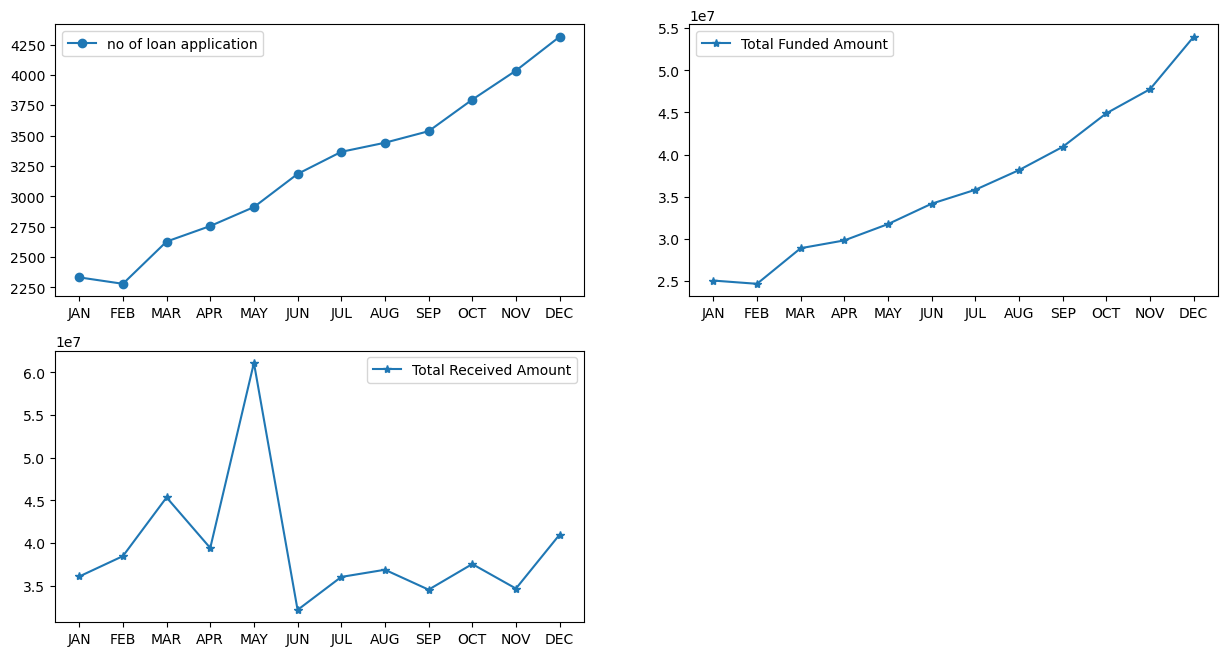

In [143]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
plt.plot(mtd.values,marker='o',label='no of loan application')
x = mtd.index.to_list()
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],months)
plt.legend()

plt.subplot(3,2,2)
plt.plot(monthly_funds.values,marker='*',label='Total Funded Amount')
x = mtd.index.to_list()
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],months)
plt.legend()

plt.subplot(3,2,3)
plt.plot(monthly_received_funds.values,marker='*',label='Total Received Amount')
x = mtd.index.to_list()
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],months)
plt.legend()

plt.show()

2. **Regional analysis by state**

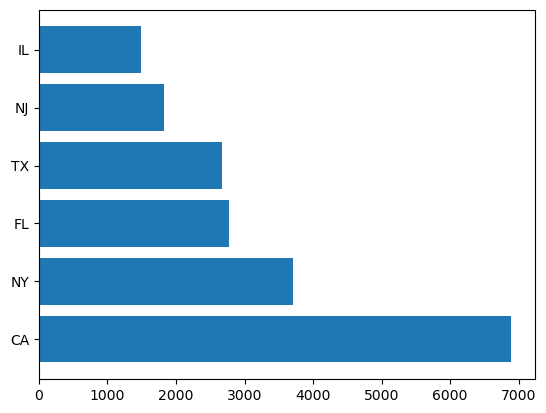

In [185]:
x = df1['address_state'].value_counts().index.to_list()[0:6]
y = df1['address_state'].value_counts().iloc[0:6]
plt.barh(x,y)
plt.show()

3. **Loan term analysis**

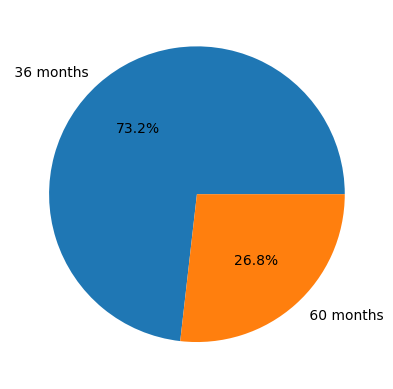

In [180]:
x = df1['term'].value_counts()
labels = df1['term'].value_counts().index.to_list()
plt.pie(x,labels=labels,autopct='%0.1f%%')
plt.show()

4. **Employee length analysis**

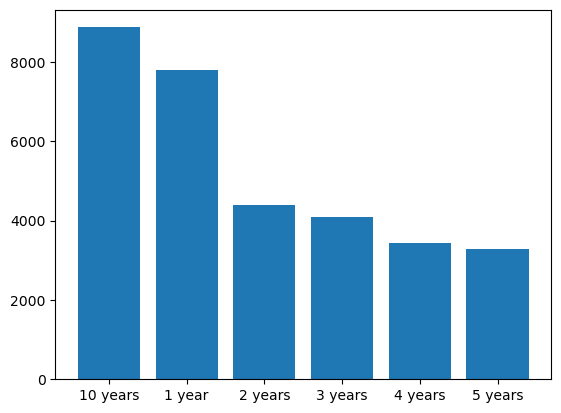

In [187]:
x = df1['emp_length'].value_counts().index.to_list()[0:6]
y = df1['emp_length'].value_counts().iloc[0:6]
plt.bar(x,y)
plt.show()

5. **Loan purpose breakdown**

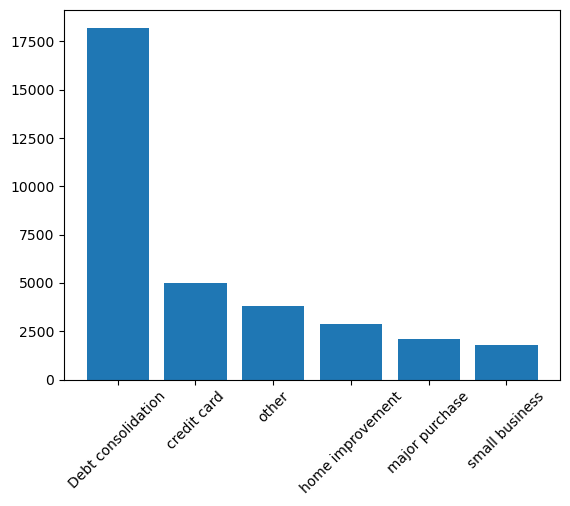

In [198]:
x = df1['purpose'].value_counts().index.to_list()[0:6]
y = df1['purpose'].value_counts().iloc[0:6]
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

6. **Home ownership analysis**

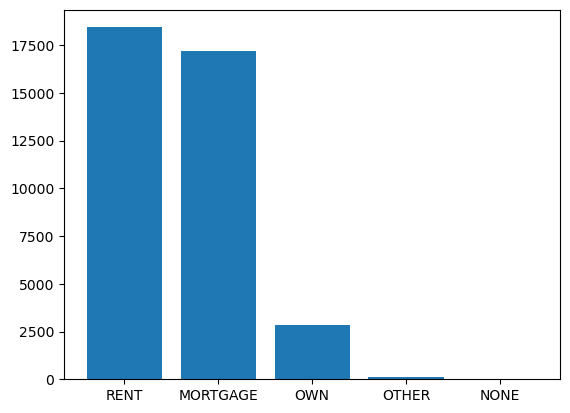

In [201]:
x = df1['home_ownership'].value_counts().index.to_list()[0:6]
y = df1['home_ownership'].value_counts().iloc[0:6]
plt.bar(x,y)
plt.show()

In [ ]:
df['issue_month'] = df['issue_date'].dt.to_period('M')
df['issue_month'].value_counts()

monthly_counts=df["issue_month"].value_counts().sort_index()
print(f"Total Application in every {monthly_counts}")

total_fund=df["loan_amount"].sum()
print(f"Total Funded Amount ${total_fund}")

monthly_funds=df.groupby("issue_month")["loan_amount"].sum()
monthly_funds

mom_changes = monthly_counts.pct_change().fillna(0)*100
print(f"Total application over month {mom_changes}")